# 1 laboratorinis (Dirbtinis neuronas) 2110599 Paulius Minajevas

## Dirbtinis neuronas

galimos aktyvacijos funkcijos: "sigmoid" [LT: "sigmoidinė"], "threshold" [LT: "slenkstinė"]

In [ ]:
import numpy as np

class Neuron:
    def __init__(self, weights, bias, activation_function):
        self.weights = np.array(weights)
        self.bias = bias
        self.activation_function = activation_function

    def activation(self, x):
        if self.activation_function == 'threshold':
            return 1 if x >= 0 else 0
        elif self.activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        else:
            raise ValueError("Invalid activation function")

    def predict(self, inputs):
        total_input = np.dot(self.weights, inputs) + self.bias
        output = self.activation(total_input)
        if self.activation_function == 'sigmoid':
            output = round(output)
        return output

## Svorių radimo metodikų įgyvendinimas

In [ ]:
import random

def find_weights_manual(data, function, min_val = -1, max_val = 1, step = .1, top = 5):
    for w1 in np.arange(min_val * 10, (max_val + 1) * 10, step * 10)/10:
        for w2 in np.arange(min_val * 10, (max_val + 1) * 10, step * 10)/10:
            for b in np.arange(min_val * 10, (max_val + 1) * 10, step * 10)/10:
                neuron = Neuron([w1, w2], b, activation_function=function)
                if all(neuron.predict([x1, x2]) == t for x1, x2, t in data):
                    print(f"Manual weight search. Activation: {function}. Suitable weights w1={w1}, w2={w2}, bias={b}")
                    if (top > 1):
                      top -= 1
                    else:
                      return
    print(f"Manual weight search. Activation: {function}. No suitable weights and bias found. Increase ranges or decrease step")
    return

def find_weights_random(data, function, trials=1000, min_val = -1, max_val = 1, top = 5):
    for _ in range(trials):
        w1 = round(random.uniform(min_val, max_val), 1)
        w2 = round(random.uniform(min_val, max_val), 1)
        b = round(random.uniform(min_val, max_val), 1)
        neuron = Neuron([w1, w2], b, activation_function=function)
        if all(neuron.predict([x1, x2]) == t for x1, x2, t in data):
            print(f"Random weight search. Activation: {function}. Suitable weights w1={w1}, w2={w2}, bias={b}")
            if (top > 1):
              top -= 1
            else:
              return
    print(f"Random weight search. Activation: {function}. No suitable weights and bias found. Increase trials")
    return

## Eksperimentas 1.a.

In [ ]:
# Input data
# (x1, x2, t)
data = [
    (-0.2, 0.5, 0),
    (0.2, -0.7, 0),
    (0.8, -0.8, 1),
    (0.8, 1, 1)
]

find_weights_manual(data, 'threshold')
find_weights_random(data, 'threshold')


Manual weight search. Activation: threshold. Suitable weights w1=0.2, w2=0.0, bias=-0.1
Manual weight search. Activation: threshold. Suitable weights w1=0.3, w2=0.0, bias=-0.2
Manual weight search. Activation: threshold. Suitable weights w1=0.3, w2=0.0, bias=-0.1
Manual weight search. Activation: threshold. Suitable weights w1=0.3, w2=0.1, bias=-0.1
Manual weight search. Activation: threshold. Suitable weights w1=0.3, w2=0.1, bias=0.0
Manual weight search. Activation: threshold. Suitable weights w1=0.4, w2=-0.1, bias=-0.2
Random weight search. Activation: threshold. Suitable weights w1=0.6, w2=-0.1, bias=-0.2
Random weight search. Activation: threshold. Suitable weights w1=0.8, w2=0.0, bias=-0.6
Random weight search. Activation: threshold. Suitable weights w1=0.4, w2=0.1, bias=-0.1
Random weight search. Activation: threshold. Suitable weights w1=0.9, w2=0.3, bias=-0.1
Random weight search. Activation: threshold. Suitable weights w1=0.4, w2=0.0, bias=-0.2
Random weight search. Activatio

## Eksperimentas 1.b.

In [ ]:
# Input data
# (x1, x2, t)
data = [
    (-0.2, 0.5, 0),
    (0.2, -0.7, 0),
    (0.8, -0.8, 1),
    (0.8, 1, 1)
]

find_weights_manual(data, 'sigmoid')
find_weights_random(data, 'sigmoid')

Manual weight search. Activation: sigmoid. Suitable weights w1=0.2, w2=0.0, bias=-0.1
Manual weight search. Activation: sigmoid. Suitable weights w1=0.3, w2=0.0, bias=-0.2
Manual weight search. Activation: sigmoid. Suitable weights w1=0.3, w2=0.0, bias=-0.1
Manual weight search. Activation: sigmoid. Suitable weights w1=0.3, w2=0.1, bias=-0.1
Manual weight search. Activation: sigmoid. Suitable weights w1=0.3, w2=0.1, bias=0.0
Manual weight search. Activation: sigmoid. Suitable weights w1=0.4, w2=-0.1, bias=-0.2
Manual weight search. Activation: sigmoid. Suitable weights w1=0.4, w2=0.0, bias=-0.3
Manual weight search. Activation: sigmoid. Suitable weights w1=0.4, w2=0.0, bias=-0.2
Manual weight search. Activation: sigmoid. Suitable weights w1=0.4, w2=0.0, bias=-0.1
Manual weight search. Activation: sigmoid. Suitable weights w1=0.4, w2=0.1, bias=-0.2
Manual weight search. Activation: sigmoid. Suitable weights w1=0.4, w2=0.1, bias=-0.1
Random weight search. Activation: sigmoid. Suitable we

## Grafinis sprendimas

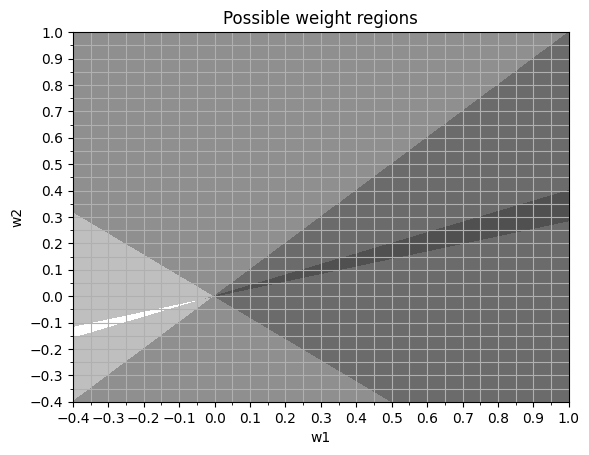

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w1_values = np.arange(-4, 11, 1) / 10
w2_values = np.arange(-4, 11, 1) / 10

w1, w2 = np.meshgrid(w1_values, w2_values)

ineq1 = -0.2 * w1 + 0.5 * w2
ineq2 = 0.2 * w1 - 0.7 * w2
ineq3 = 0.8 * w1 - 0.8 * w2
ineq4 = 0.8 * w1 + w2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(-10, 11, 1) / 10
minor_ticks = np.arange(-20, 20, 1) / 20

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')

plt.contourf(w1, w2, ineq1, levels=[-np.inf, 0], colors=['black'], alpha=0.25)
plt.contourf(w1, w2, ineq2, levels=[-np.inf, 0], colors=['black'], alpha=0.25)
plt.contourf(w1, w2, ineq3, levels=[0, np.inf], colors=['black'], alpha=0.25)
plt.contourf(w1, w2, ineq4, levels=[0, np.inf], colors=['black'], alpha=0.25)

plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Possible weight regions')
plt.grid(True)
plt.show()

Grafinių sprendinių patikra

In [ ]:
w1 = float(input('Enter w1: '))
w2 = float(input('Enter w2: '))

data = [
    (-0.2, 0.5, 0),
    (0.2, -0.7, 0),
    (0.8, -0.8, 1),
    (0.8, 1, 1)
]

neuron = Neuron([w1, w2], 0, 'threshold')
if all(neuron.predict([x1, x2]) == t for x1, x2, t in data):
  print('Values are valid solution')

Enter w1: 0.3
Enter w2: 0.1
Values are valid solution
